# Predicting CMS Prevalence of Diabetes at County Level based on AHRQ Social Determinants of Health


__[GitHub: SocialHealthAI/CMS-CDC-SDOH](https://github.com/SocialHealthAI/CMS-CDC-SDOH)__

## Overview
Studies show a strong correlation between social determinants of health and mental/physical health. __[County Health Rankings, Relationships Between Determinant Factors
and Health Outcomes](https://www.ajpmonline.org/article/S0749-3797(15)00514-0/fulltext)__ provides a detailed analysis of social features correlated to premature death, low birth weight and poor mental/physical health.  

''<img src='./diabetes_ohio.png' title='Ohio Diabetes Prevalence and Social Vulnerability Index' />

The target for the models is the prevalence (percent) of diabetes based in a county.  Prevalence data is obtained from the Center of Medicare and Medicaid Services (CMS) diabetes claims.  The features used to predict the target are social determinants of health (SDOH).  SDOH features are obtained from the  Agency for Healthcare Research and Quality (AHRQ).

## Benefits
The models can be used in several ways:
- Ranking the important SDOH features for a county.
- Predicting the CMS prevalence based on SDOH features changes.
- Predicting the CMS prevalence when new AHRQ SDOH data is available.

# Acquire Data

## Aquire CMS Diabetes Claims
Call CMS Chronic Data notebook using year and disease parameters.

In [21]:
parm_CMSChronic_year = '2018'
parm_CMSChronic_disease = 'Diabetes'
%run ./dataCMSChronic.ipynb
dfCMSChronicPrevalence = out_CMSChronic()
dfCMSChronicPrevalence

,STATE,COUNTY,FIPS,DIABETES
3,Alabama,Autauga,01001,31.0290
4,Alabama,Baldwin,01003,23.5492
5,Alabama,Barbour,01005,32.6483
6,Alabama,Bibb,01007,32.6255
7,Alabama,Blount,01009,28.6635
...,...,...,...,...
3247,Wyoming,Sweetwater,56037,21.7601
3248,Wyoming,Teton,56039,9.6583
3249,Wyoming,Uinta,56041,22.5342
3251,Wyoming,Washakie,56043,23.0028


## Explore CMS Data
Show prevalence in sorted barchart for particular state.

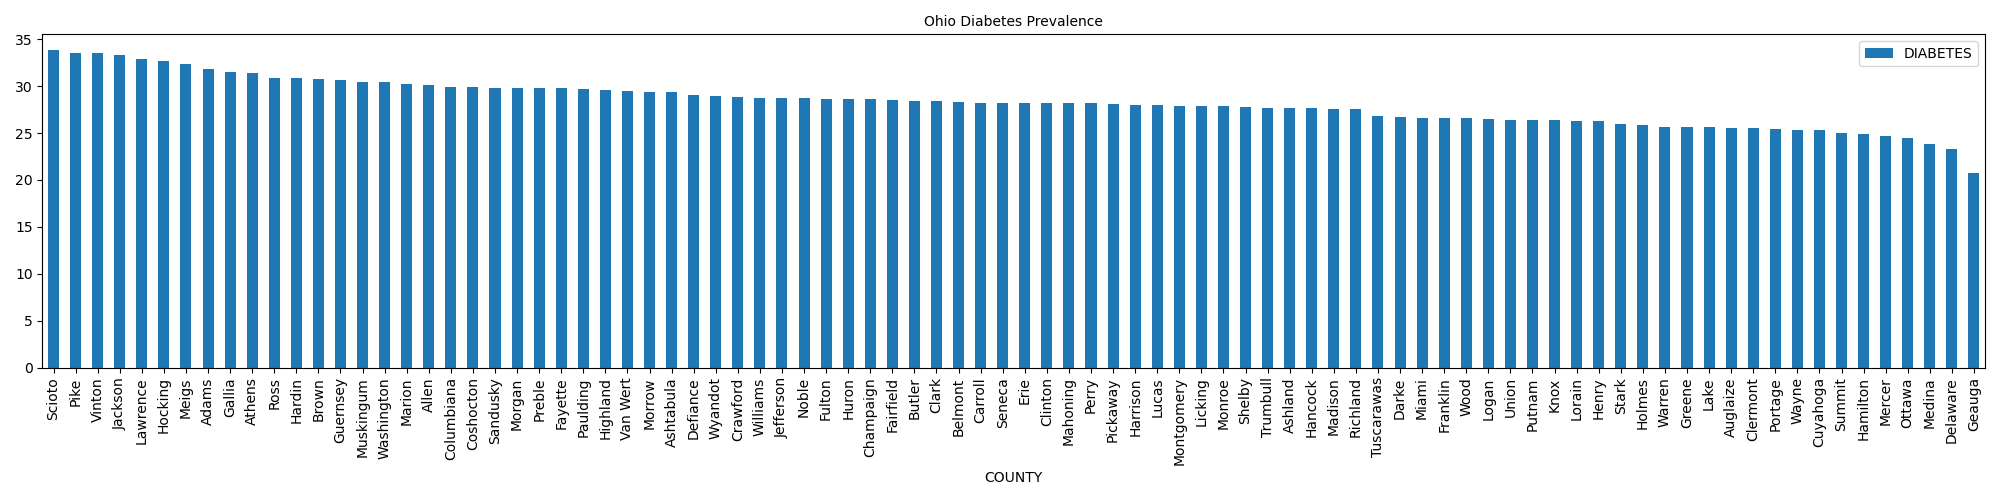

In [25]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
dfDisplay = dfCMSChronicPrevalence[dfCMSChronicPrevalence.STATE == 'Ohio']
dfDisplay= dfDisplay.sort_values('DIABETES',ascending=False)
dfDisplay.plot(x="COUNTY", y="DIABETES", kind="bar", figsize=(20,5))
plt.title("Ohio Diabetes Prevalence", fontsize=10)
plt.tight_layout()
plt.show()

## Acquire AHRQ Data
Call AHRQ SDOH Data notebook using year parameter.

In [17]:
parm_AHRQCountySDOH_year = '2018'
%run ./dataAHRQCountySDOH.ipynb
dfAHRQCountySDOH = out_AHRQCountySDOH()
dfAHRQCountySDOH

,STATE,COUNTY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,...,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND
0,Alabama,Autauga,55200.0,54509.0,51937.0,44358.0,43368.0,2865.0,37166.0,41284.0,...,0.0,0.00,0.0,0.00,1.0,0.02,50.00,38.89,11.11,0.0
1,Alabama,Baldwin,208107.0,206023.0,196498.0,170486.0,167712.0,9933.0,146989.0,162122.0,...,0.0,0.00,0.0,0.00,4.0,0.02,63.49,36.51,0.00,0.0
2,Alabama,Barbour,25782.0,25469.0,24392.0,21265.0,20948.0,1117.0,18173.0,20346.0,...,0.0,0.00,0.0,0.00,1.0,0.04,73.33,20.00,6.67,0.0
3,Alabama,Bibb,22527.0,22112.0,21252.0,18785.0,18470.0,1199.0,15780.0,17868.0,...,1.0,0.04,1.0,0.04,1.0,0.04,38.46,38.46,23.08,0.0
4,Alabama,Blount,57645.0,57144.0,54160.0,46533.0,45915.0,3099.0,39627.0,44126.0,...,0.0,0.00,0.0,0.00,1.0,0.02,60.00,40.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,Puerto Rico,Yabucoa Municipio,34149.0,NaN,32683.0,28620.0,28146.0,1859.0,23916.0,27196.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0
3228,Puerto Rico,Yauco Municipio,36439.0,NaN,34821.0,30626.0,30226.0,1960.0,25976.0,29212.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0
3229,US Virgin Islands,St. Croix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,NaN
3230,US Virgin Islands,St. John Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,NaN


## Explore AHRQ Data
Show correlations or food related SDOH.

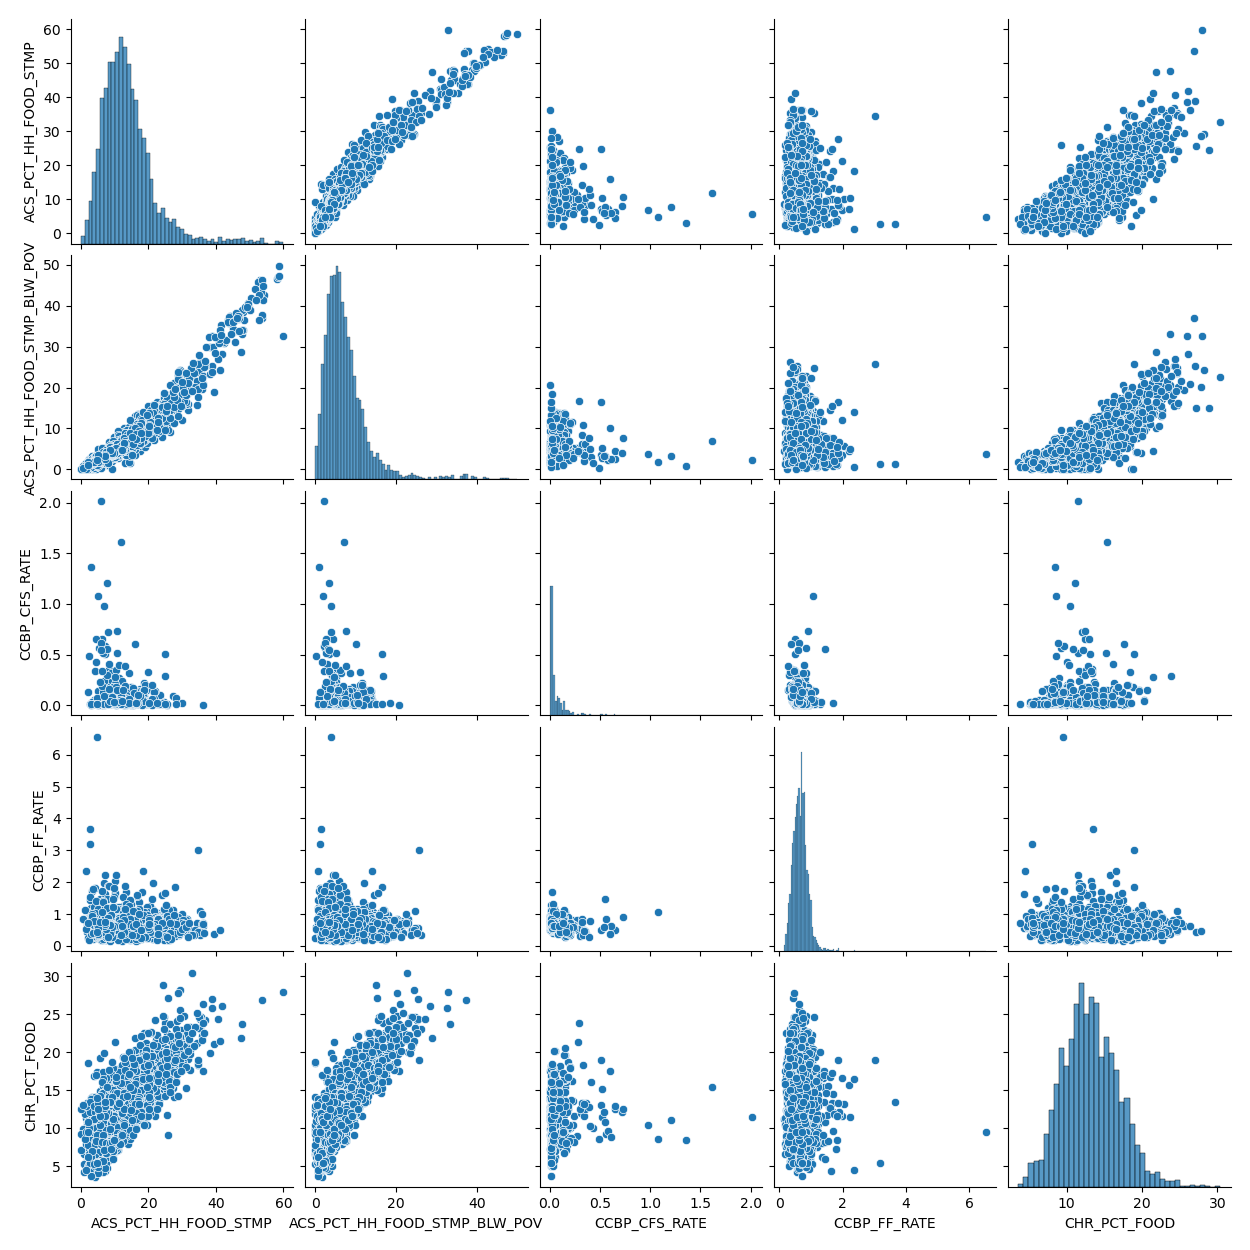

In [18]:
import seaborn as sns             # more matplotlib visualizations
dfAHRQFood = dfAHRQCountySDOH[['STATE', 'COUNTY', 'ACS_PCT_HH_FOOD_STMP', 'ACS_PCT_HH_FOOD_STMP_BLW_POV' , 'CCBP_CFS_RATE', 'CCBP_FF_RATE', 'CHR_PCT_FOOD']]
sns.pairplot(dfAHRQFood)


# Prepare and Clean Data

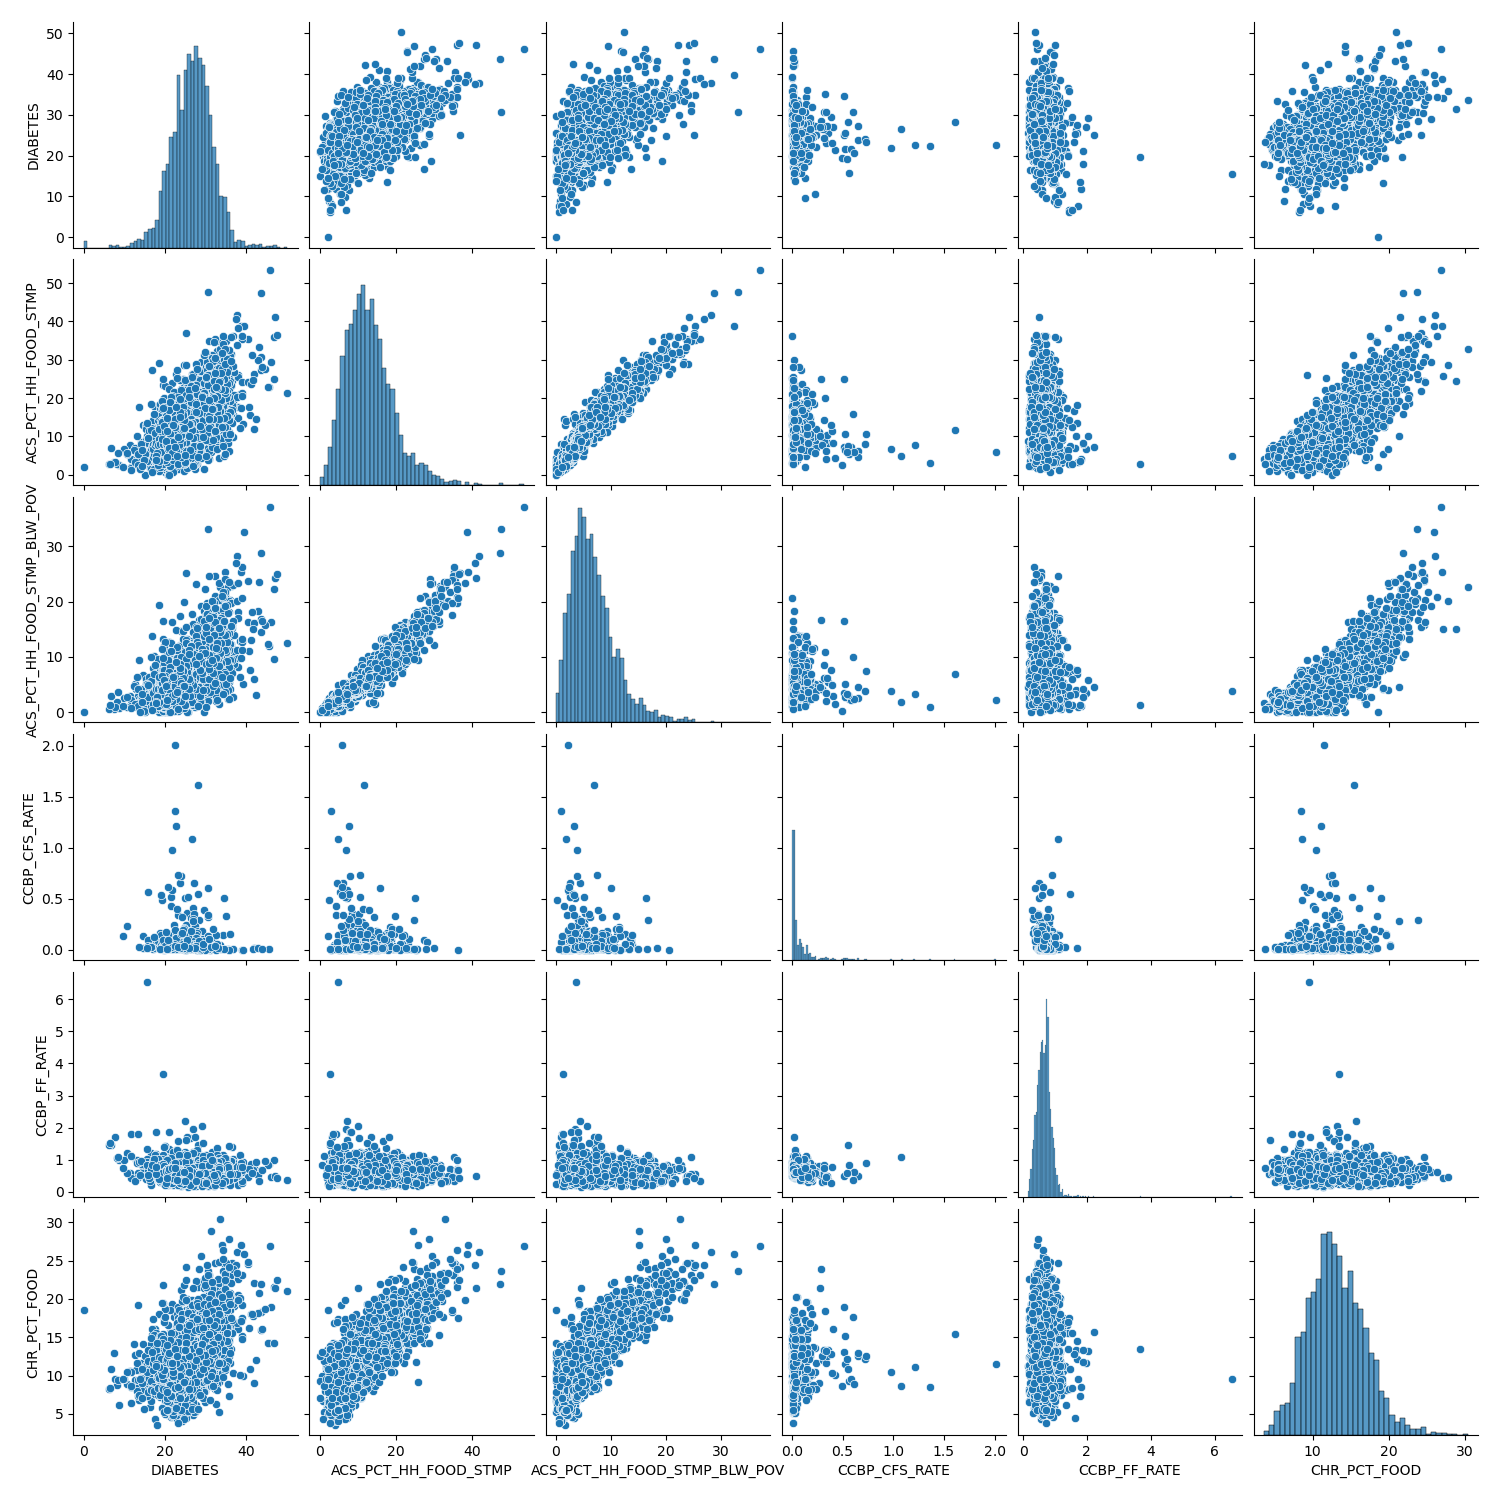

In [27]:
#dfCMSChronicPrevalence
dfMerged = pd.merge(dfCMSChronicPrevalence, dfAHRQFood,  how='left', left_on=['STATE','COUNTY'], right_on = ['STATE','COUNTY'])
sns.pairplot(dfMerged)

# Develop Models and Evaluate Performance

## Regression

## Random Forest

## Boosted Trees

# Publish Models